In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('/content/drive/MyDrive/disney.csv')
df

,Unnamed: 0,rating,review,date,userName,title
0,0,5,컨텐츠야 디즈니니까 당연히 넘쳐나는데 검색 기능이 상대적으로 부실합니다. 예를 들면...,2021-11-11 20:33:32,악틱,좋습니당. 몇 가지 건의 사항
1,1,5,디즈니 만화와 영화를 사랑하는 사람으로써 몇 가지 개선해주셨으면 하는 바가 있어 남...,2021-11-15 12:15:12,이제가을,디즈니를 아끼는 마음으로 남겨요~
2,2,5,1년권 끊고 한 달만에 후회했는데 문나이트로 뽕 뽑음. 문나이트만 한 다섯번째 돌...,2022-06-06 05:58:35,양털끄트머리,하나만 걸려도 충분하다
3,3,3,전반 적으로 만족 합니다만 넷플이나 기타 스트리밍 앱에서 되는 것들이 안되는게 있어...,2021-11-14 06:14:34,filco518,기대하던 디플 앱 드디어 사용 해봤네요
4,4,5,성인인증 시 프로필 PIN 넘버 입력 키보드 자판이 안뜨고 구글 크롬캐스트4 사용 ...,2021-11-11 23:59:48,무무니,컨텐츠 많아서 좋긴한데
...,...,...,...,...,...,...
4535,3457,5,짱,2022-03-12 20:00:39,김지혜,NaN
4536,3458,5,👍,2022-01-14 16:35:11,정윤재,NaN
4537,3459,1,Good 😉😉😉😉😉😉😉😉😉😉😉,2021-03-23 13:07:45,Jacob Won,NaN
4538,3460,1,1000000000000000000000000000000000000000000000...,2022-01-24 21:45:05,황은비,NaN


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4540 entries, 0 to 4539
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4540 non-null   int64 
 1   rating      4540 non-null   int64 
 2   review      4540 non-null   object
 3   date        4540 non-null   object
 4   userName    4540 non-null   object
 5   title       1078 non-null   object
dtypes: int64(2), object(4)
memory usage: 212.9+ KB


In [11]:
df.date = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4540 entries, 0 to 4539
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  4540 non-null   int64         
 1   rating      4540 non-null   int64         
 2   review      4540 non-null   object        
 3   date        4540 non-null   datetime64[ns]
 4   userName    4540 non-null   object        
 5   title       1078 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 212.9+ KB


In [12]:
df['quarter'] = df['date'].dt.quarter
df.quarter

0       4
1       4
2       2
3       4
4       4
       ..
4535    1
4536    1
4537    1
4538    1
4539    1
Name: quarter, Length: 4540, dtype: int64

In [13]:
df['year'] = df['date'].dt.strftime('%Y')
df.year

0       2021
1       2021
2       2022
3       2021
4       2021
        ... 
4535    2022
4536    2022
4537    2021
4538    2022
4539    2022
Name: year, Length: 4540, dtype: object

In [14]:
df.quarter = df.quarter.astype('str')

In [15]:
df.quarter = df.year + '/' + df.quarter + 'Q'
df.quarter

0       2021/4Q
1       2021/4Q
2       2022/2Q
3       2021/4Q
4       2021/4Q
         ...   
4535    2022/1Q
4536    2022/1Q
4537    2021/1Q
4538    2022/1Q
4539    2022/1Q
Name: quarter, Length: 4540, dtype: object

In [16]:
df = df.sort_values(by=['date'])

<function matplotlib.pyplot.show>

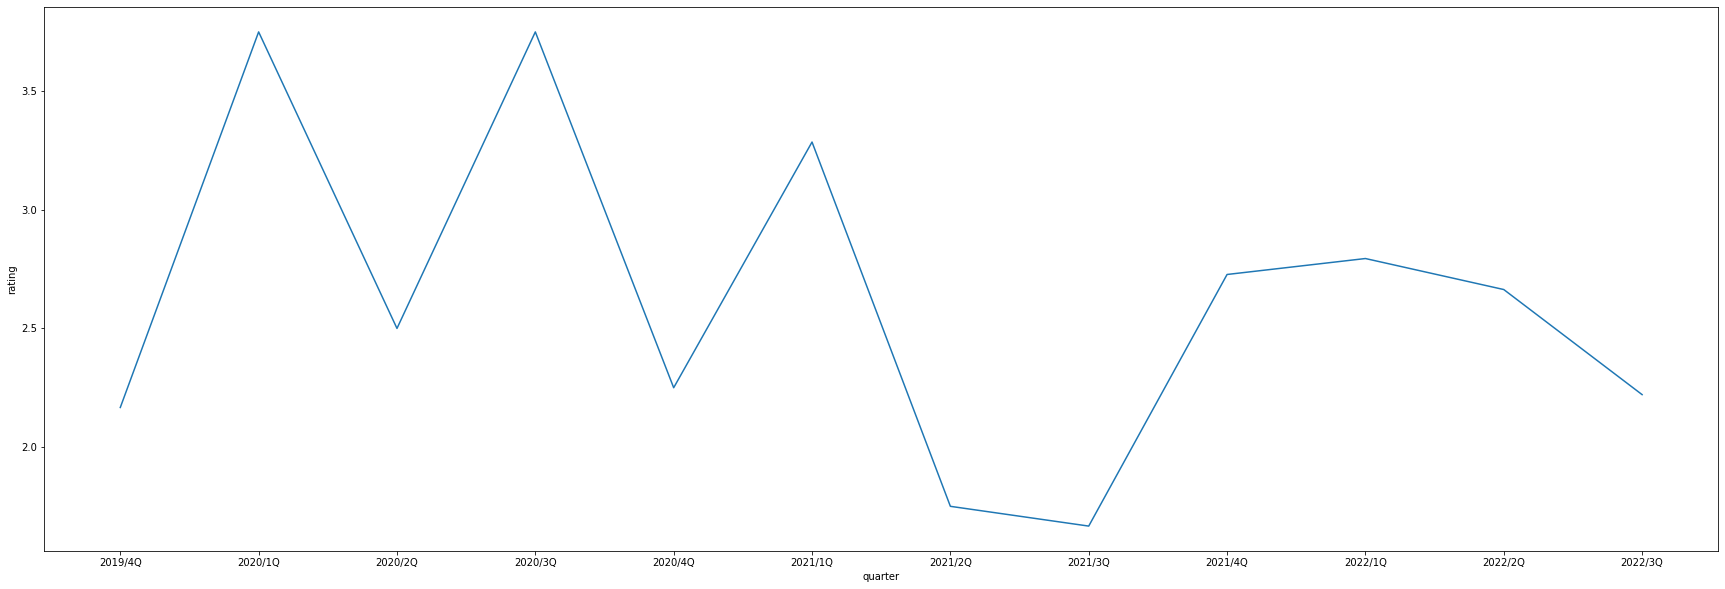

In [17]:
# disney
plt.subplots(figsize=(30,10))
sns.lineplot(x='quarter', y='rating', data=df, ci=None)
plt.show